## PCS5024 - Aprendizado Estatístico
 - Primeiro trimestre 2023 
 - Profs. Anna Helena Realli Costa e Fábio Gagliardi Cozman 
 - Aluno: Caio Azevedo - caio.aze@alumni.usp.br
 - Entrega em: 30.03.23

## Trabalho 1 - Descrição
A entregar até 31/3 via edisciplinas: uma folha apenas (frente e verso) em formato pdf, contendo descrição concisa relativa às seguintes atividades:

1) Obtenha a base Adult (por exemplo no UCI Repository or no Kaggle). - **ok**

Recomendação: leia sobre o UCI Repository e o Kaggle, são recursos importantes.

2) Analise os atributos, dados faltantes, e características gerais da base Adult, usando ferramentas da sklearn. Selecione atributos, discretize atributos numéricos, processe dados faltantes. Se possível use Jupyter para desenvolver seu trabalho.

3) Construa um classificador para a variável ">50k" da base Adult (ou seja, se a pessoa ganha mais do que US$50k por ano ou não). Use um classificador Nearest Neighbour com seleção de hiperparâmetro via validação cruzada; se preferir, divida a base de treino em duas partes respectivamente para treino e validação. 

5) Apresente acurácia, precisão e revocação do melhor classificador Nearest Neighbour obtido.

6) Ponto extra: teste um classificador Naive Bayes para a mesma variável com os mesmos atributos.

## Objetivo
 - Análise para classificação das pessoas que ganham mais de U$50k por ano. 
 - **Projeto Classificação Binária**

## Sobre o dataset

### Características descritivas
| Data Set Characteristics | Number of Instances | Attribute Characteristics | Number of Attributes | Associated Tasks | Missing Values? 
| --- | --- | --- | --- | --- | --- 
| Multivariate | 48842 | Categorical, Integer | 14 | Classification | Yes 

### Sobre os atributos

- **income** (target): <=50K, >50K

- **age**: continuous.
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: continuous.
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - -  - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num**: continuous.
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex**: Female, Male.
- **capital-gain**: continuous.
- **capital-loss**: continuous.
- **hours-per-week**: continuous.
- **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Referências:
 - https://archive.ics.uci.edu/ml/datasets/adult
 - https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
 - http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
 - http://www.cs.toronto.edu/~delve/data/adult/desc.html
 - https://www.scaler.com/topics/data-science/categorical-missing-values/ 
 
 
 - https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
 - https://medium.com/analytics-vidhya/handle-missing-values-in-categorical-features-b7c5b073dda2
 - https://www.scaler.com/topics/data-science/categorical-missing-values/
 - https://github.com/itdxer/adult-dataset-analysis/blob/master/Data%20analysis.ipynb
 - https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
 - https://medium.com/analytics-vidhya/adult-census-income-dataset-using-multiple-machine-learning-models-f289c960005d
 - https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php
 

 boas implementações
 - https://www.kaggle.com/code/bhupendrarajput/complete-eda-and-machine-learning
 - https://www.kaggle.com/uciml/adult-census-income
 - https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
 - https://arxiv.org/ftp/arxiv/papers/1810/1810.10076.pdf
 - https://github.com/itdxer/adult-dataset-analysis
 - https://github.com/itdxer/adult-dataset-analysis/blob/master/Data%20analysis.ipynb
 https://github.com/itdxer/adult-dataset-analysis/blob/master/Classification.ipynb

## Implementação EDA (exploratory data analysis)

### Importação bibliotecas

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
from pandas_profiling import ProfileReport

In [3]:
%matplotlib inline
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

### Constantes

In [4]:
#'https://raw.githubusercontent.com/Bhupendra1770/Adult-Census-Income-Prediction/main/adult.csv'
APP_PATH = os.getcwd()
DATA_DIR = os.path.join(APP_PATH, 'data')
TRAIN_DATA_FILE = os.path.join(DATA_DIR, 'adult.data.csv')
TEST_DATA_FILE = os.path.join(DATA_DIR, 'adult.test.csv')
target_column = "income"

### Análise inicial da amostra

 **Considerações do autor**: 
 - *Os arquivos obtidos da url de referência foram divididos em adult.data, contendo* **32.561** *registros e o arquivo adult.test com 16.281 registros, um total de* **48.842** *registros.* 
 - _Para esse estudo, mudei o formato dos arquivos para csv e incluir os nomes das colunas manualmente, conforme descrição do dataset e mantive os arquivos originais na pasta 'data'._ 
 - _Sendo assim, o arquivo adult.data.csv, será utilizado para o treinamento e validação das técnicas de classificação, enquanto que o arquivo adult.test.csv, será utilizada para testar seus respectivos desempenhos._
 
PS: essa primeira análise foi feita por inspeção visual, considerando estatísticas e distribuições dos dados

In [5]:
def read_dataset(path):
    data = pd.read_csv(
        path,
        index_col=None,
        comment='|', 
    )
    #data = data.drop('fnlwgt', axis=1)
    return data

In [12]:
train_data = read_dataset(TRAIN_DATA_FILE)
train_data.head(5)

age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital-loss  hours-per-week  native-country  income  
0             0              40   United-States   <=50K  
1             0              13   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40   United-States   <=50K  
4             0              40            Cuba   <=50K

In [13]:
test_data = read_dataset(TEST_DATA_FILE)
test_data.head()

age   workclass      education  education-num       marital-status  \
0   25     Private           11th              7        Never-married   
1   38     Private        HS-grad              9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44     Private   Some-college             10   Married-civ-spouse   
4   18           ?   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   income  
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
4             0              30   United-States   <=50K.

_Observa-se uma inconsistência na variável target, income, da base de testes por conta da existencia de um ponto no final.
Será necessário remove-lo durante o processamento dos dados._

In [14]:
print("Número de linhas e colunas dos dados de treino: {}".format(train_data.shape))
print("Número de linhas e colunas dos dados de : {}".format(test_data.shape))
print("Total de {} registros em análise".format(train_data.shape[0] + test_data.shape[0]))

número de linhas e colunas dos dados de treino: (32561, 14)
número de linhas e colunas dos dados de : (16281, 14)
total de 48842 registros em análise


_Cada dataset possue 14 colunas preditoras. O total de registros da amostra condiz com o especificação do arquivo "Dataset Description.odt"._

**Visão geral dos dados disponíveis. Os dataset de treino e teste foram agrupados para identificação de eventuais inconsistências.**

In [15]:
data = pd.concat([test_data, train_data])
data.describe(include='all')

age workclass education  education-num       marital-status  \
count   48842.000000     48842     48842   48842.000000                48842   
unique           NaN         9        16            NaN                    7   
top              NaN   Private   HS-grad            NaN   Married-civ-spouse   
freq             NaN     33906     15784            NaN                22379   
mean       38.643585       NaN       NaN      10.078089                  NaN   
std        13.710510       NaN       NaN       2.570973                  NaN   
min        17.000000       NaN       NaN       1.000000                  NaN   
25%        28.000000       NaN       NaN       9.000000                  NaN   
50%        37.000000       NaN       NaN      10.000000                  NaN   
75%        48.000000       NaN       NaN      12.000000                  NaN   
max        90.000000       NaN       NaN      16.000000                  NaN   

             occupation relationship    race    sex  capital-gain  \
count             48842        48842   48842  48842  48842.000000   
unique               15            6       5      2           NaN   
top      Prof-specialty      Husband   White   Male           NaN   
freq               6172        19716   41762  32650           NaN   
mean                NaN          NaN     NaN    NaN   1079.067626   
std                 NaN          NaN     NaN    NaN   7452.019058   
min                 NaN          NaN     NaN    NaN      0.000000   
25%                 NaN          NaN     NaN    NaN      0.000000   
50%                 NaN          NaN     NaN    NaN      0.000000   
75%                 NaN          NaN     NaN    NaN      0.000000   
max                 NaN          NaN     NaN    NaN  99999.000000   

        capital-loss  hours-per-week  native-country  income  
count   48842.000000    48842.000000           48842   48842  
unique           NaN             NaN              42       4  
top              NaN             NaN   United-States   <=50K  
freq             NaN             NaN           43832   24720  
mean       87.502314       40.422382             NaN     NaN  
std       403.004552       12.391444             NaN     NaN  
min         0.000000        1.000000             NaN     NaN  
25%         0.000000       40.000000             NaN     NaN  
50%         0.000000       40.000000             NaN     NaN  
75%         0.000000       45.000000             NaN     NaN  
max      4356.000000       99.000000             NaN     NaN

In [16]:
profile = ProfileReport(data, title="Análise exploratória das features do dataset")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Primeiras impressões
 - Observou-se que não temos atributos preenchidos com null (NaN), no entanto, dados desconhecidos/faltantes estão preenchidos com o caracter '?'
 - Para facilitar o tratamento dos dados, por conta dos métodos de tratamento de nulls, substitui o caracter '?' por nulo/NaN.
 - Quando da análise das amostras agrupadas, percebe-se que temos quatro valores possíveis para variável target, , quando na verdade deveriam ser apenas dois. Observando as amostras isoladamente, vemos que os valores 'adicionais' estão na amostra de testes.
 - Por definição o atributo ‘fnlwgt’, que remete ao peso final dos registros analisados não possuem relação com a variável target e por isso será removido.
 - Os atributos ‘education.num’ e ‘education’ são reduntantes, visto que o primeiro é a representação ordinal do segundo, e por tanto, deverá ser removido também.

**Caracter '.' no final do valor do atributo target income**

In [18]:
test_data.income.value_counts(dropna=False)

 <=50K.    12435
 >50K.      3846
Name: income, dtype: int64

In [19]:
train_data.income.value_counts(dropna=False)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

_**Esse ponto adicional deverá ser removido nos procedimentos de tratamento dos atributos.**_

**Ocorrência recorrente do caracter ?**
Observando os valores possíveis das variáveis categóricas, identificou-se a existência do caracter ?, que remete aos valores não preenchidos. Na análise abaixo identificamos em quais atributos preditores eles estão e suas respectivas quantidades.

In [21]:
(data == ' ?').sum(axis=0)

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

_**Esses caracteres serão substituidos por NaN.**_

**Preenchimento suspeito com 9s**
- Dois atributos preditores 'capital-gain' e 'hours-per-week' possuem no o valor máximo cheios de 9s. Isso é pelo menos suspeito, visto que é comum as pessoas usarem desse artifício para preencherem campos numéricos com valores desconhecidos, especialmente quando na interface com o usuário, o campo é do tipo obrigatório.

In [67]:
import heapq
heapq.nlargest(10, data['hours-per-week'].unique())

[99, 98, 97, 96, 95, 94, 92, 91, 90, 89]

In case of hours_per_week we can see that there are some unique values that close to 99

In [68]:
hours_per_week_counts = data['hours-per-week'].value_counts()
largest_hours_per_week = heapq.nlargest(10, data['hours-per-week'].unique())
hours_per_week_counts[hours_per_week_counts.index.isin(largest_hours_per_week)]

99    137
90     42
98     14
96      9
91      3
89      3
92      3
97      2
95      2
94      1
Name: hours-per-week, dtype: int64

If we check countwise it's clear that 99 is unusually large compare to other values. It also could be that 99 means 99+ hours and long tail might fit into this category.

### Check duplicates

In [69]:
n_samples_before = train_data.shape[0]
n_samples_after = train_data.drop_duplicates().shape[0]

print(n_samples_before)
print(n_samples_after)
print("Duplicates removed: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

32561
29096
Duplicates removed: 10.64%


 - **2399** de 32561 registros excluídos da amostra

After removing final weight column we get 10% of duplicates in the training data. We need to remove it before continuing our analysis in order to avoid biases.

### Apply first cleaning steps

These steps allow us to address biggest issues that we found so far. Without this fixes it will be harder to do data analysis.

In [75]:
def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income'] = data.income.str.rstrip('.')
    
    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('fnlwgt', axis=1)
    
    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()

    return data

def read_dataset(path):
    return pd.read_csv(
        path,
        index_col=None,
        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native-country': '?',
            'occupation': '?',
        },
    )

train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))

# We will use data as a shortcut to the train_data. We will avoid
# using test data during the analysis in order to make sure that
# there won't be any information leakage from the test data
data = train_data

- nenhum registro excluído da amostra, todos os dados faltantes substituidos pelo mais frequente. 

#### Checking data distributions

In [104]:
#categorical columns
cat_col=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat_col.append(i)
        
cat_col  

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

<Figure size 842.4x595.44 with 0 Axes>

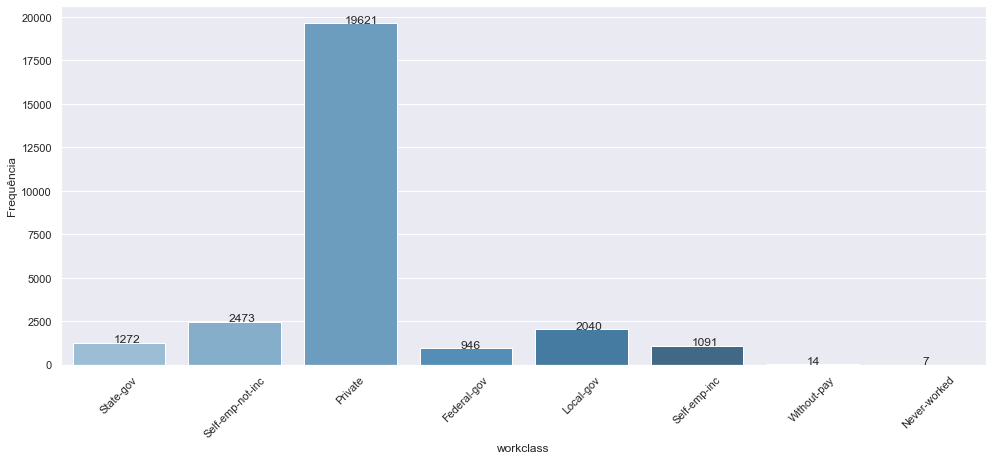

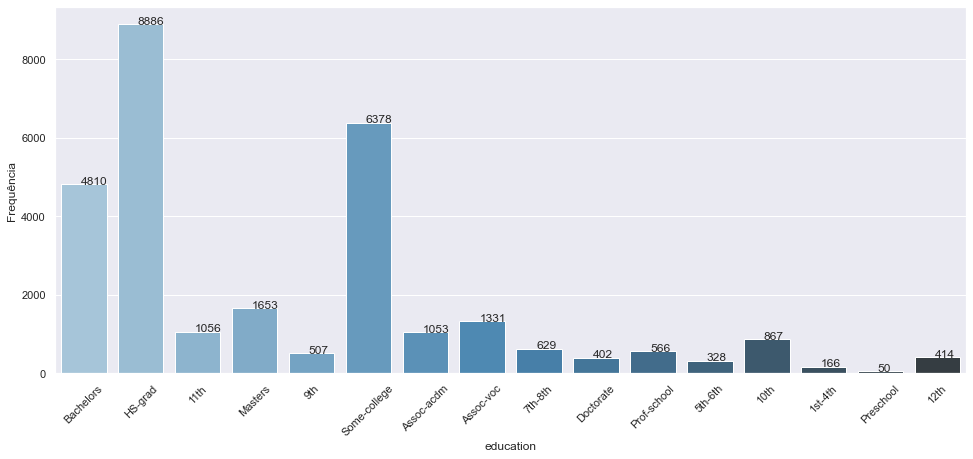

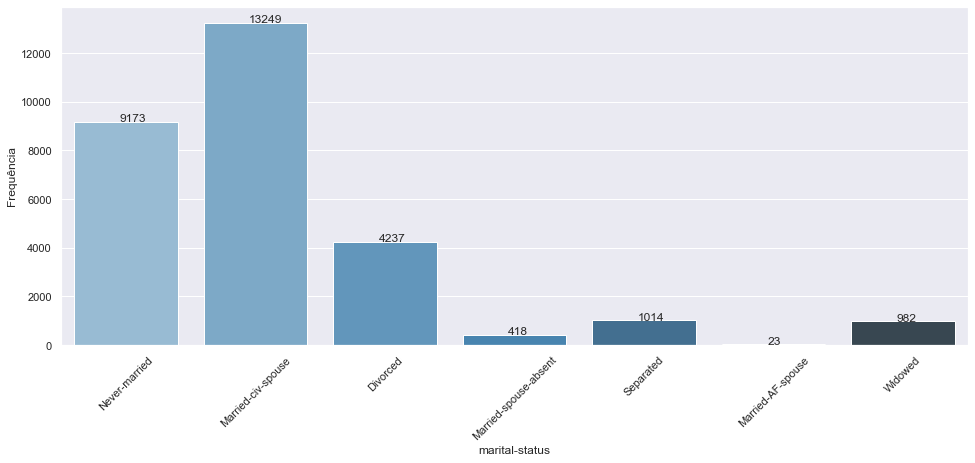

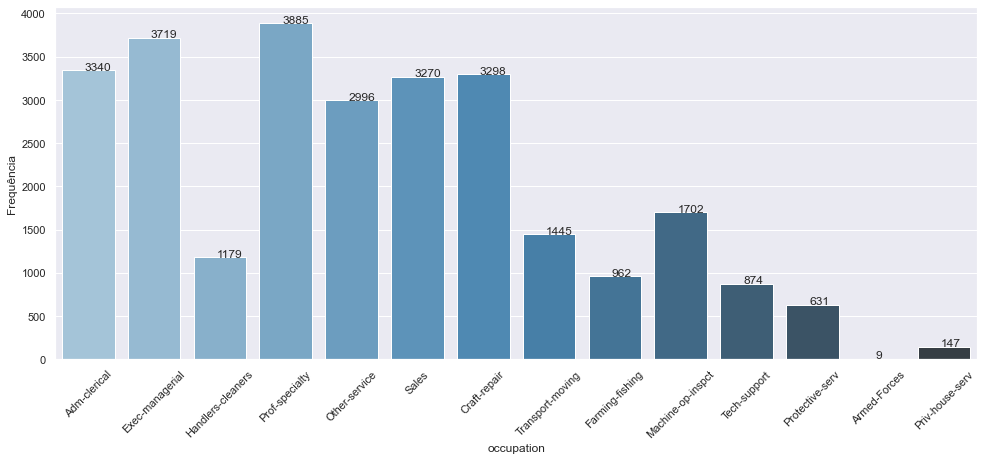

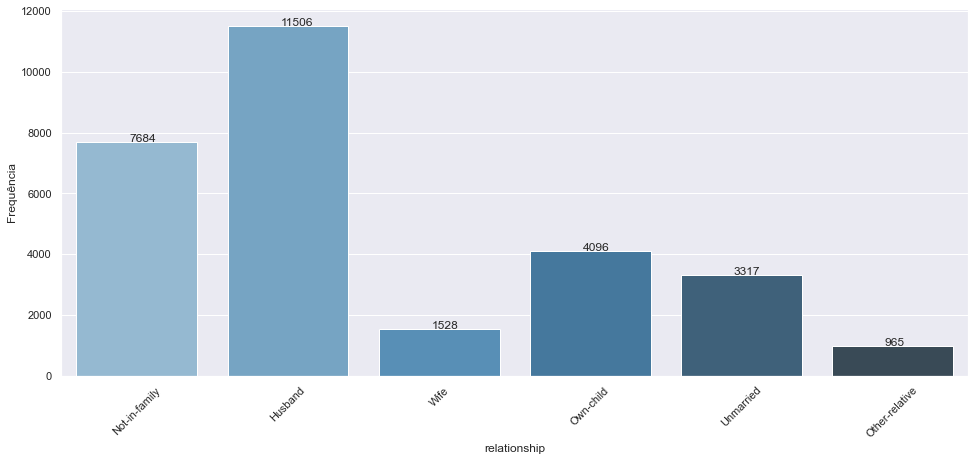

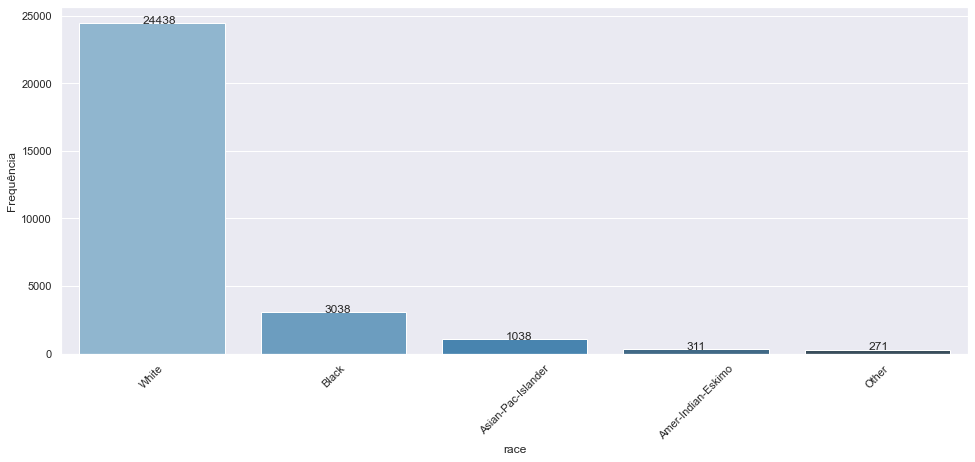

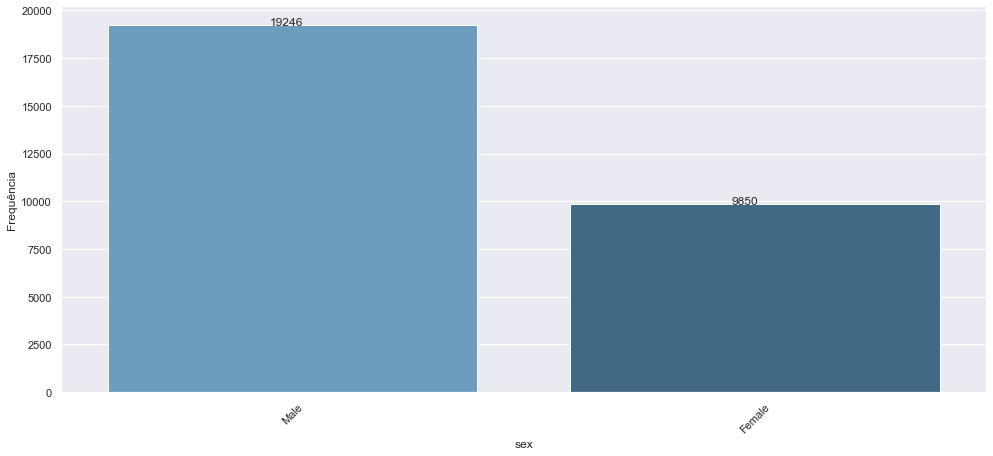

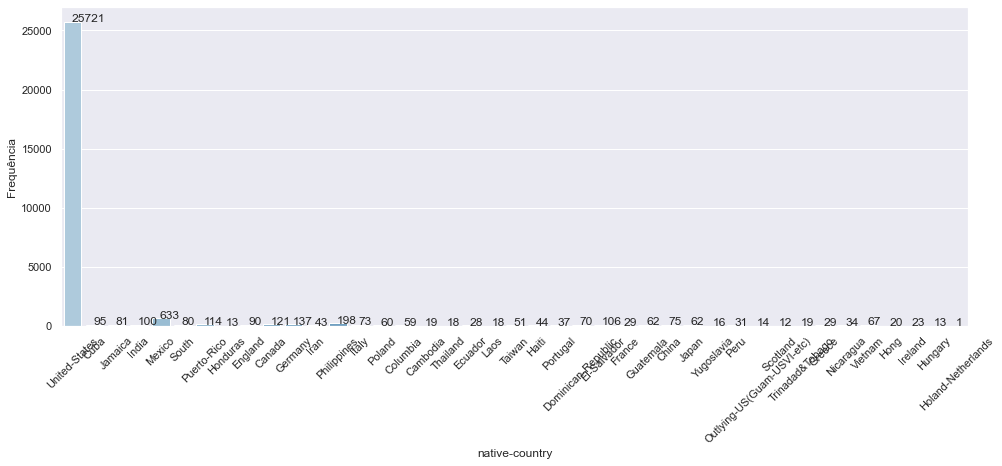

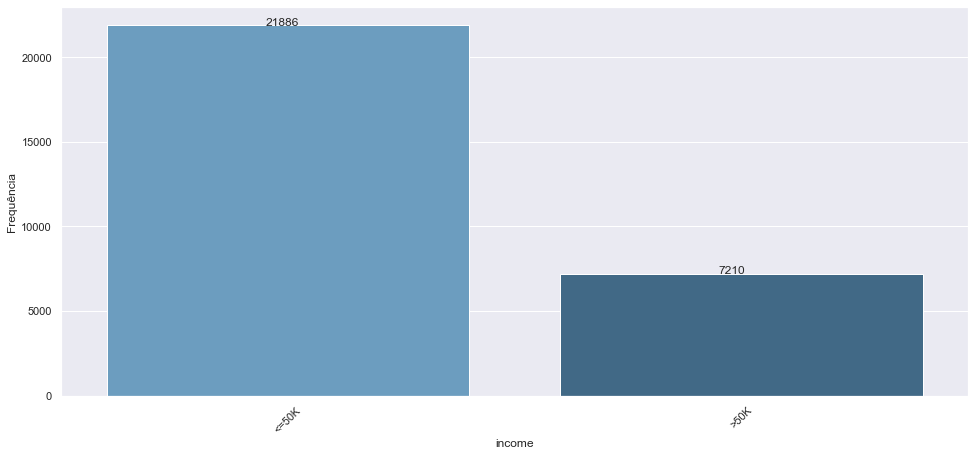

In [105]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    #sns.countplot(x=df[cat_col[i]])
    #plt.xlabel(cat_col[i])
    #plt.xticks(rotation=45)
    #plt.tight_layout()
    ax = sns.countplot(x=data[cat_col[i]], data=data, palette="Blues_d")
    plt.subplots_adjust(bottom=0.4)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
    plt.xticks(rotation=45)
    plt.xlabel(cat_col[i])
    plt.ylabel('Frequência')
    plt.tight_layout()
    #plt.show()

Observations:

Quite large number of the race=White values

Quite large number of the workclass=Private values.

Quite large number of the natice_country=United-States values. This variable can be either ignore or replaced. with binary variable like from_united_states that will be equal to True if person from united states, and False otherwise.

### Checking histograms for numerical columns

 - optamos por atribuir 0 para os salários <= 50k e 1 para os maiores que 50k

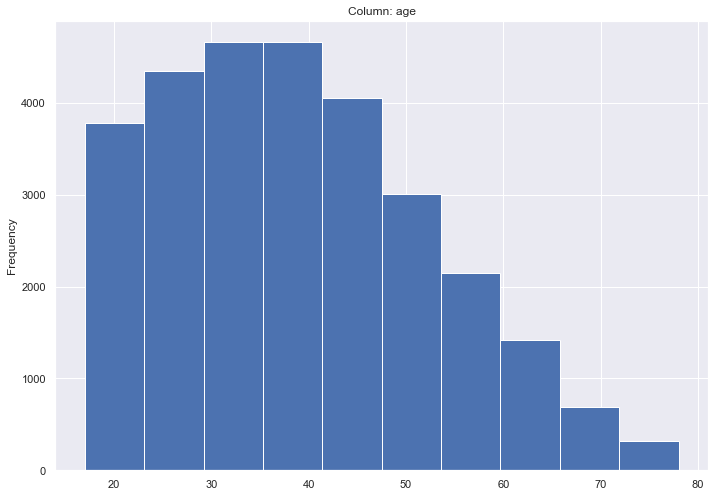

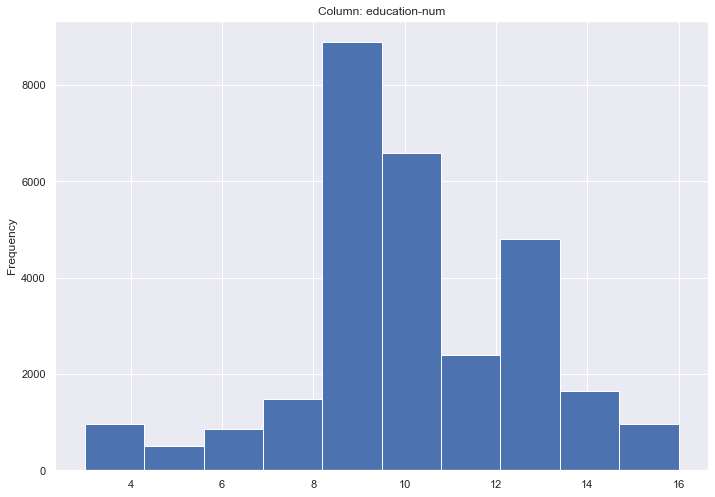

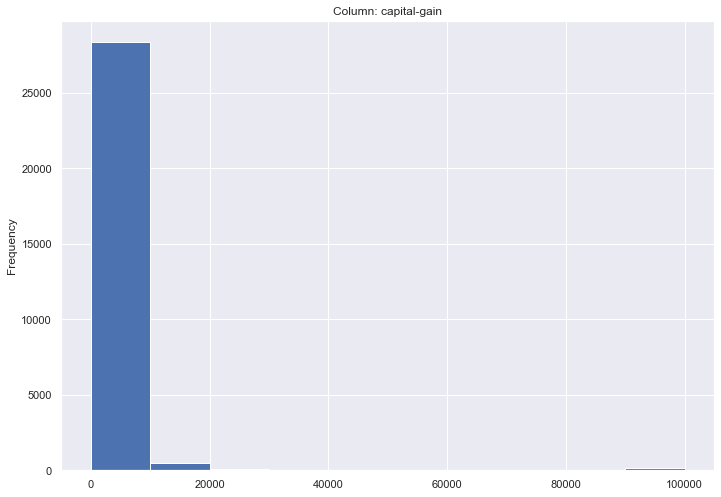

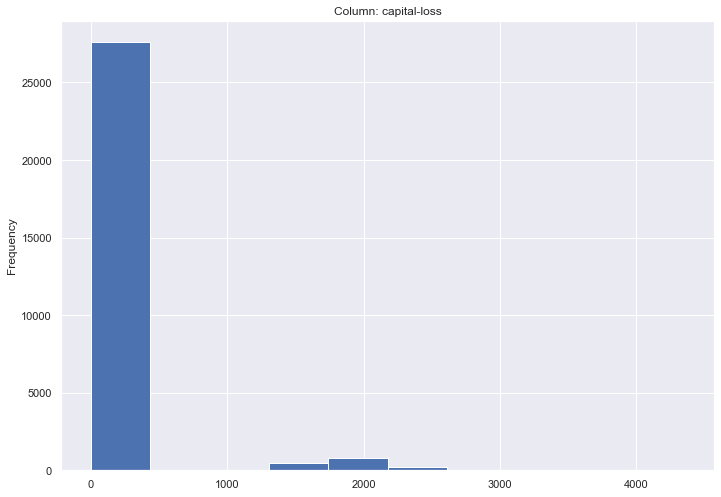

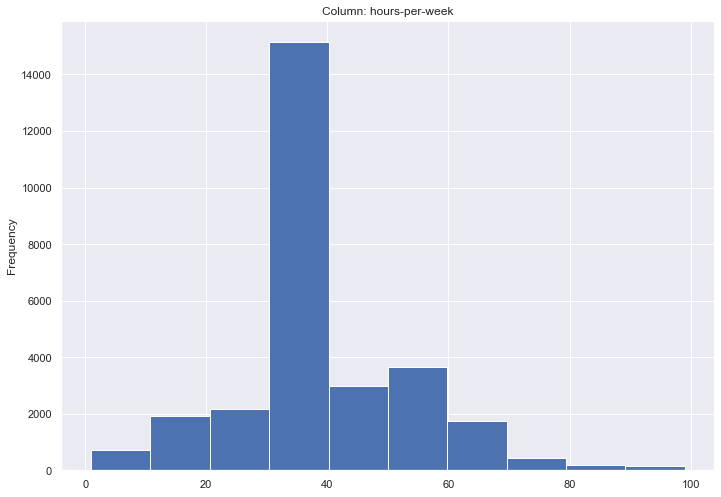

In [106]:
for colname, column_series in data._get_numeric_data().iteritems():
    plt.title('Column: ' + colname)
    column_series.plot(kind='hist')
    plt.show()

Observations:

The hours_per_week has large spike where value equal to 40 which makes sense since it's the most common number of working hours per week for average person.

The capital_loss and capital_gain variables have large spike where value equal to zero. It's typicall that average person doesn't have additional incomes. It makes sense to see distribution without zero values for these columns.

The education_num column has two spikes. First spike around the number of years that it takes to complete school for the average person and the second one for university.

In [107]:
#increasing default charts dimensions
sns.set(rc={'figure.figsize':(11.7,8.27)})

<Figure size 842.4x595.44 with 0 Axes>

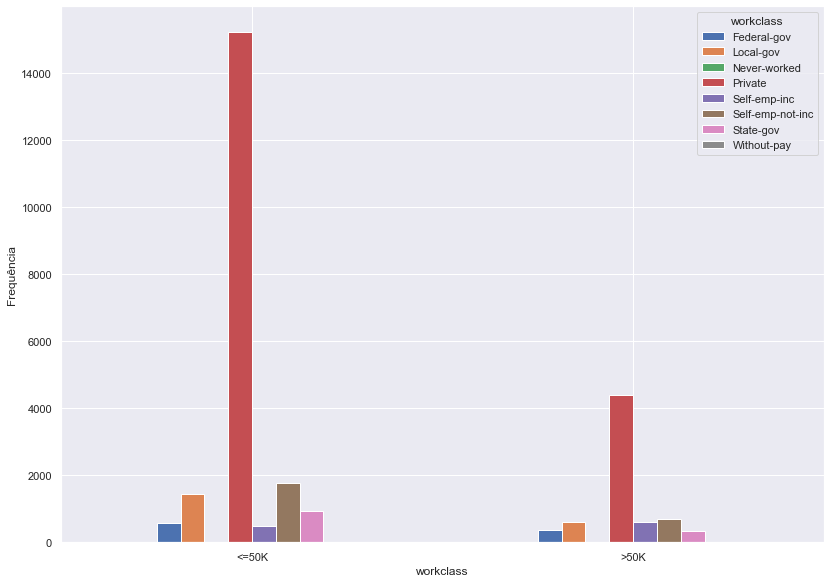

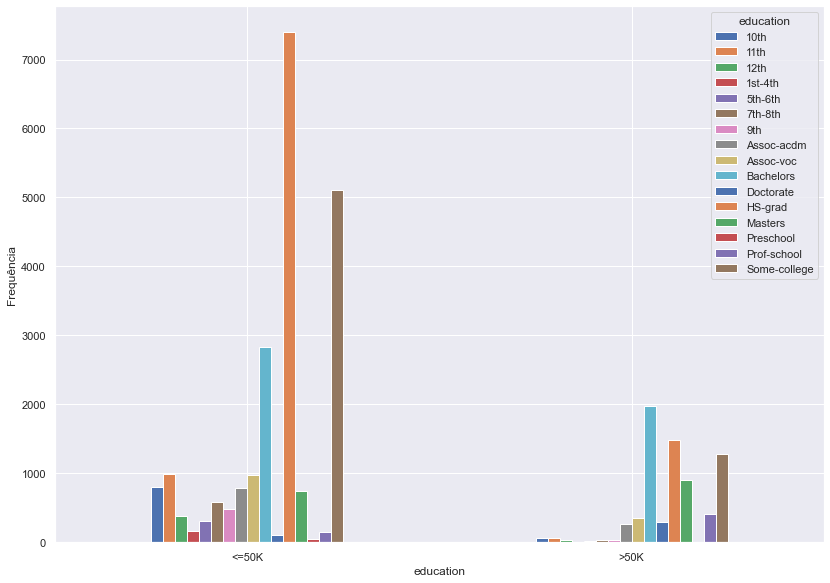

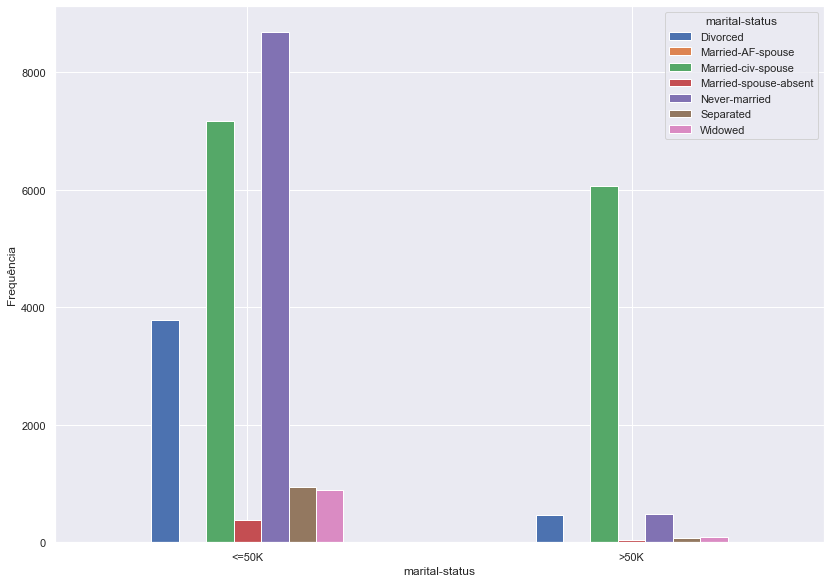

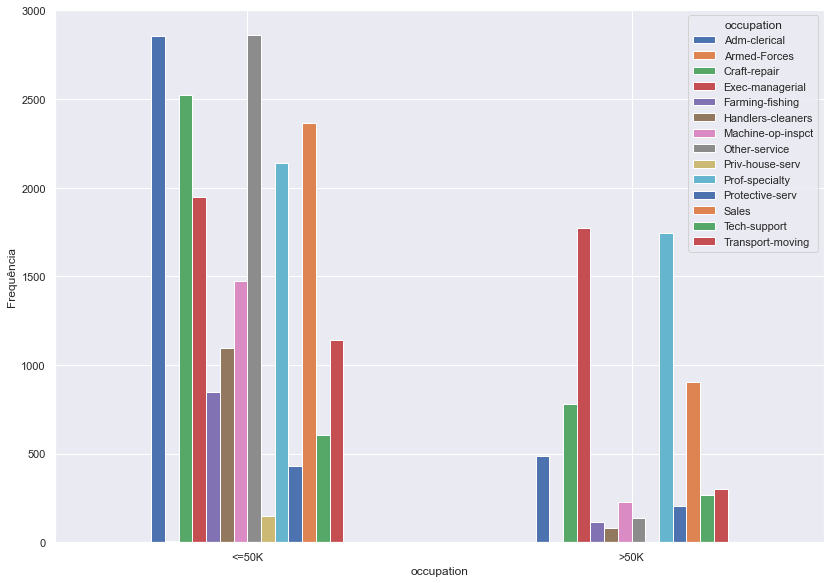

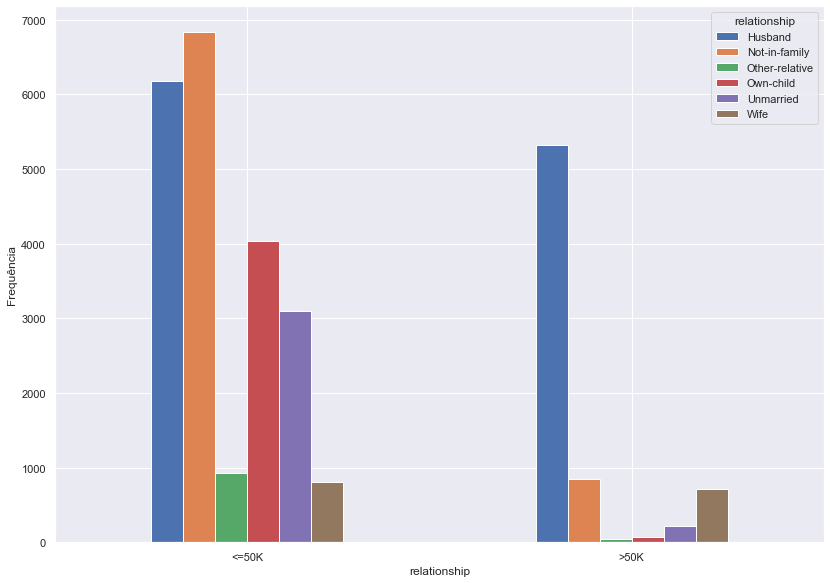

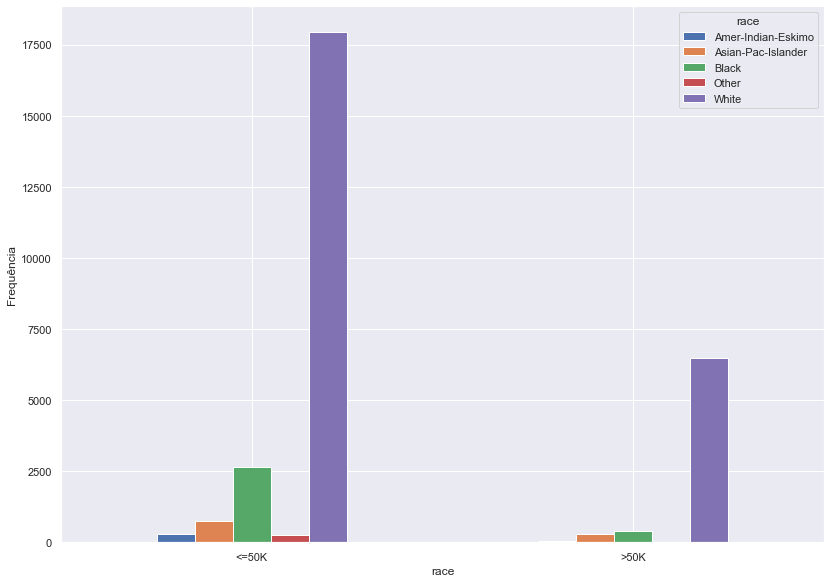

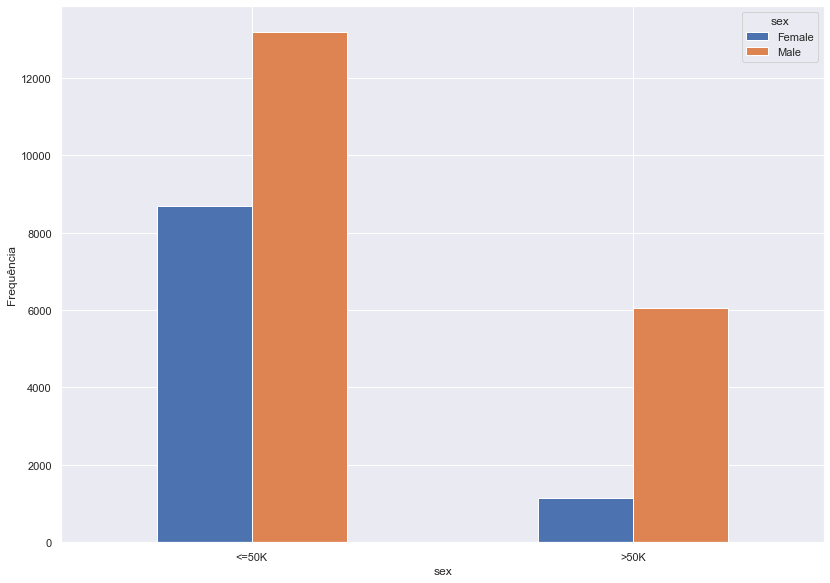

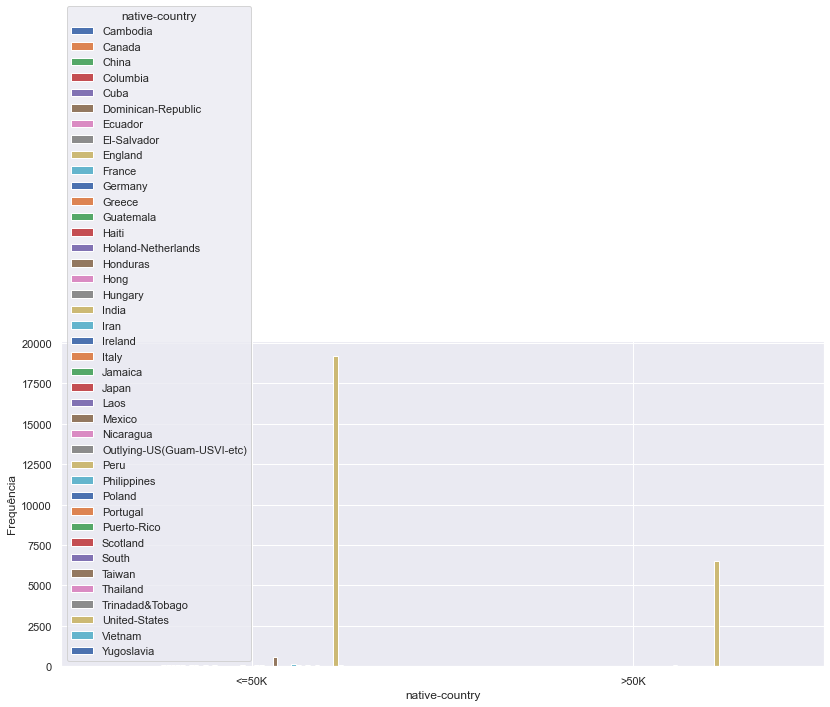

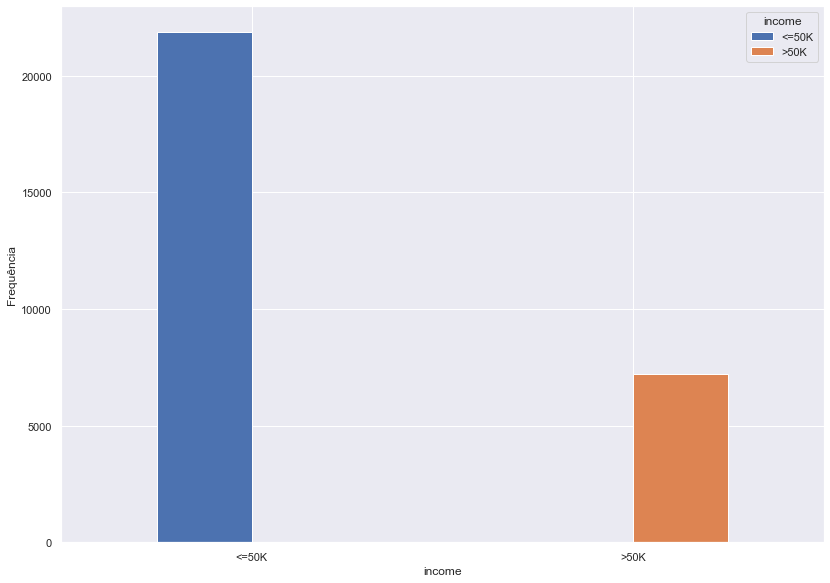

In [108]:
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    class_income = pd.crosstab(data['income'],data[cat_col[i]])
    class_income.plot(kind='bar')
    #plt.subplots_adjust(bottom=0.4)
    #for p in ax.patches:
    #    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
    plt.xticks(rotation=0)
    plt.xlabel(cat_col[i])
    plt.ylabel('Frequência')
    plt.tight_layout()
    #plt.show()

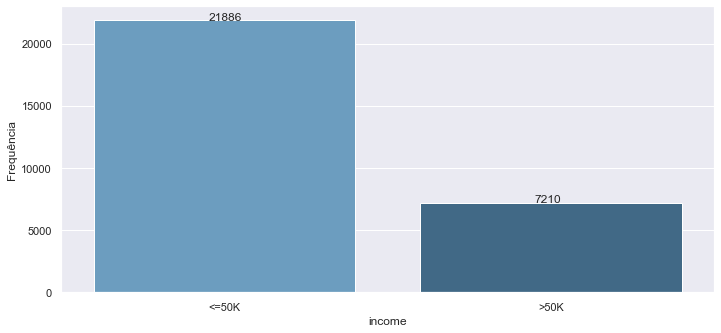

In [109]:
#Distribuição dos salários da amostra (percebe-se que ela está, sob esse critério, desbalanceada)
ax = sns.countplot(x="income", data=data, palette="Blues_d")
plt.subplots_adjust(bottom=0.4)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+2))
plt.ylabel('Frequência')
plt.show()

<AxesSubplot:xlabel='income'>

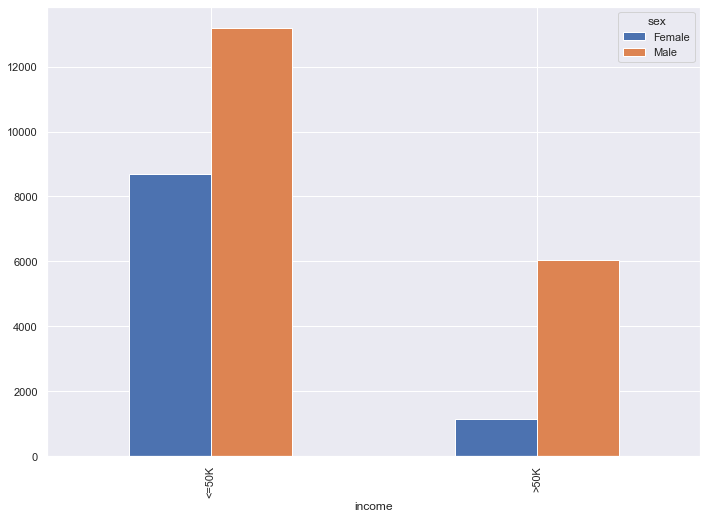

In [110]:
#checking male and female ration according to their salary
class_sex = pd.crosstab(data['income'],data['sex'])
class_sex.plot(kind='bar')

<AxesSubplot:xlabel='workclass', ylabel='Count'>

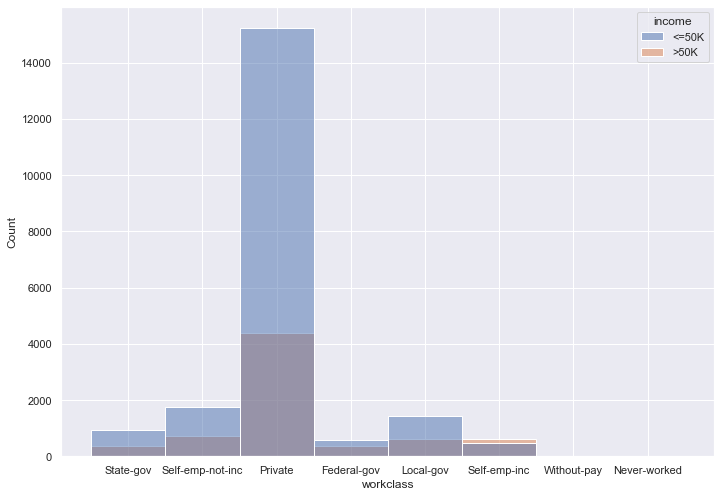

In [111]:
sns.histplot(x="workclass",data=data, bins=15, kde=False, hue='income')

 
 - Dados desbalanceados quanto a variável target com 7841 registros acima de 50k (24% do total) e 24720 abaixo.
 - Os homens são maioria independente da faixa salarial, embora sua proporção seja maior entre aqueles que ganham acima de 50K. Os trabalhadores alocados na iniciativa privata são a maioria da amostra de treino, com 74% do total, e os que concentram os maiores salários.
 - Os maiores salários estão entre aqueles dedicados à iniciativa privada, com maior grau de instrução (Graduatos, Doutores e mestres, embora tenhamos uma parcela significativa que apenas concluiram o ensino fundamental). Também estão nessa categoria os casados e maridos, brancos e oriundos dos EUA.

In [112]:
#numeric columns
num_col=[]
for i in data.columns:
    if data[i].dtype=='int64':
        num_col.append(i)

num_col = num_col[0:2]
num_col

['capital-gain', 'capital-loss']

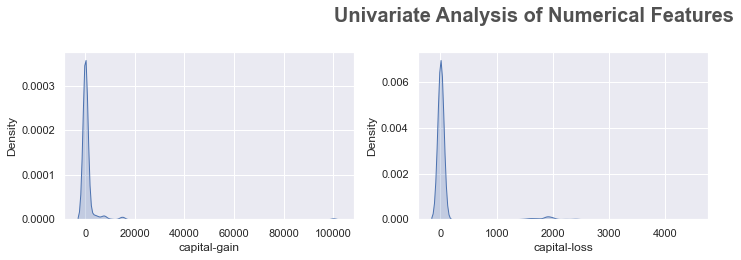

In [113]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

### Correlação entre as variáveis numéricas

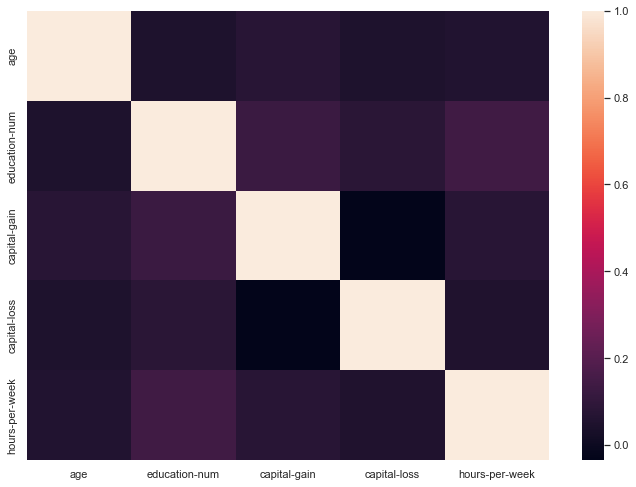

In [114]:
corr = data._get_numeric_data().corr()
sns.heatmap(
    corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
);

Numerical feautres have very low correlation.

### Split feature effects per category

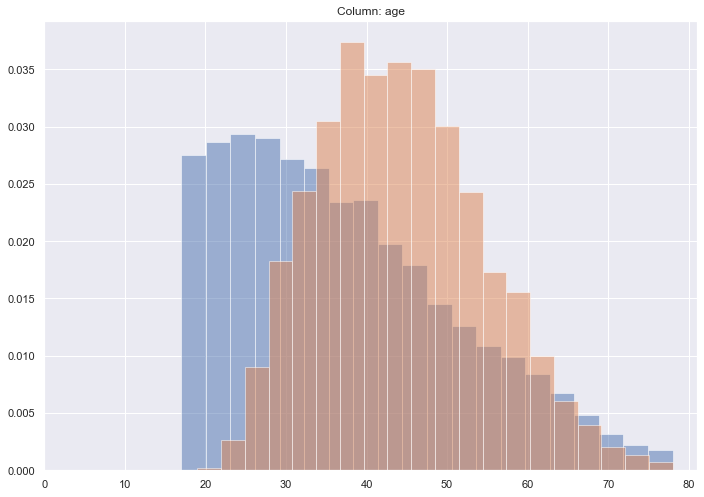

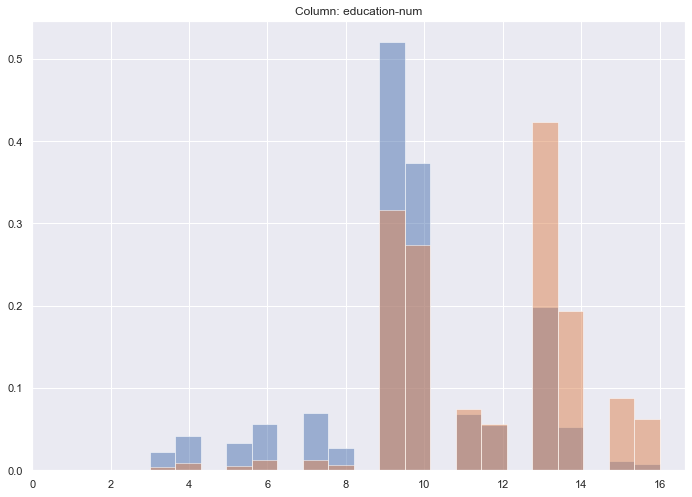

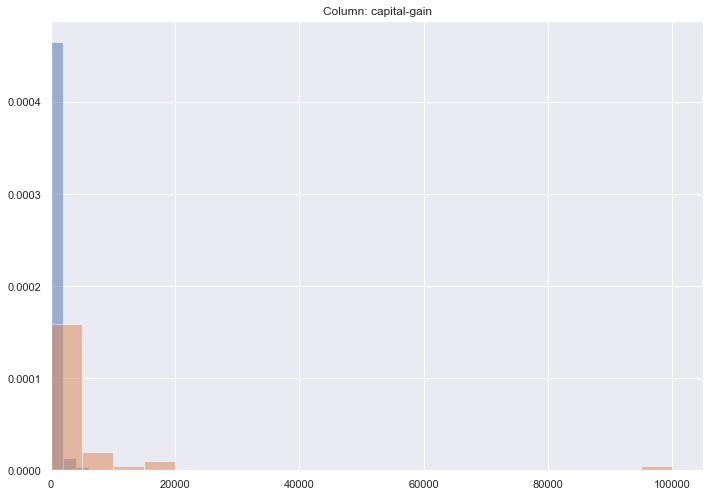

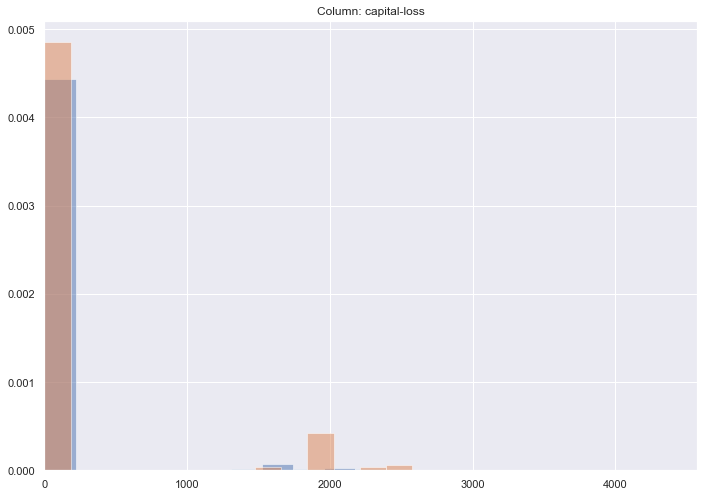

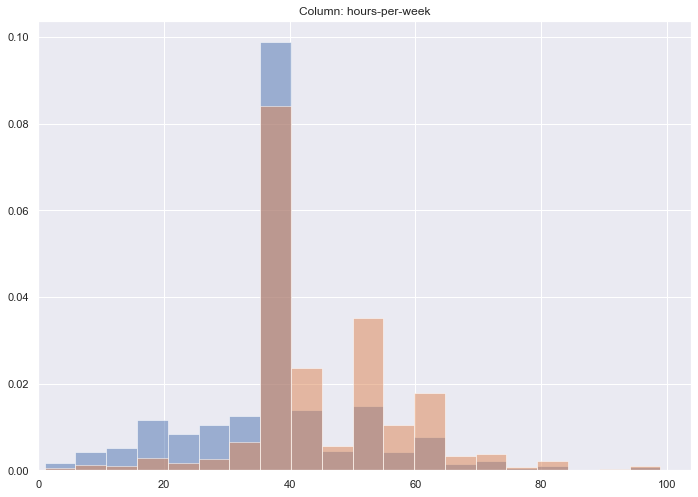

In [115]:
for colname in data._get_numeric_data().columns:
    df = data
    
    if colname in ('capital_gain', 'capital_loss'):
        # These columns have large number of zeros and it will skew
        # distribution. In order to avoid this issue we cut zero values
        # from the distribution.
        df = df[(data[colname] != 0) & ~data[colname].isnull()]
        
    low_income = df.loc[df[target_column] == '<=50K', colname]
    high_income = df.loc[df[target_column] == '>50K', colname]
    
    plt.title('Column: ' + colname)
    plt.hist(low_income, label='<=50K', bins=20, density=True, alpha=0.5)
    plt.hist(high_income, label='>50K', bins=20, density=True, alpha=0.5)
    
    xmin, xmax = plt.xlim()
    plt.xlim(0, xmax)
    plt.show()

Observations:

The older the person the more likely it will have higher income

The more years of education person had the more likely it will have higher income.

The more person works the more income this person has.

###  Categorical columns

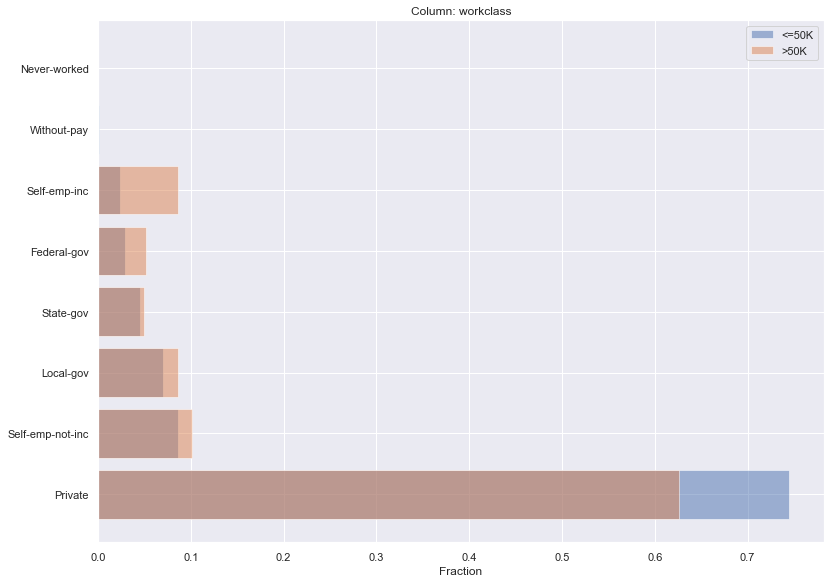

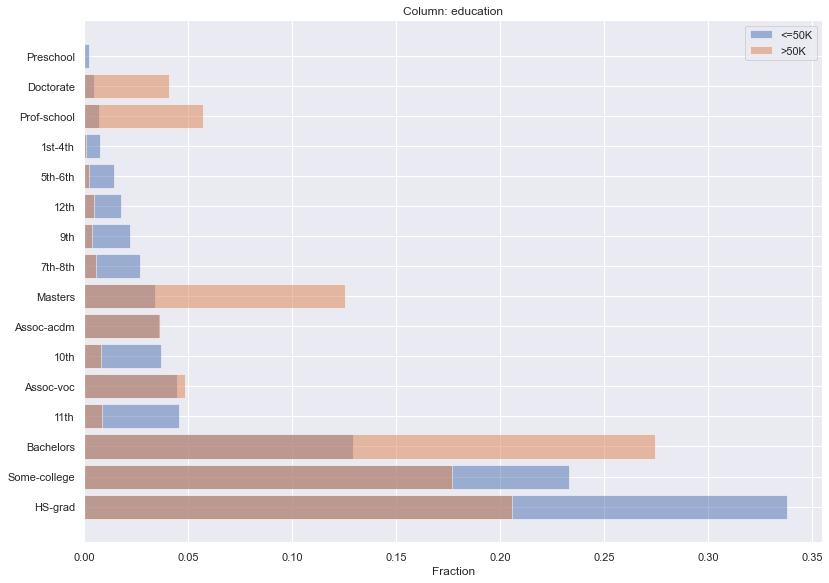

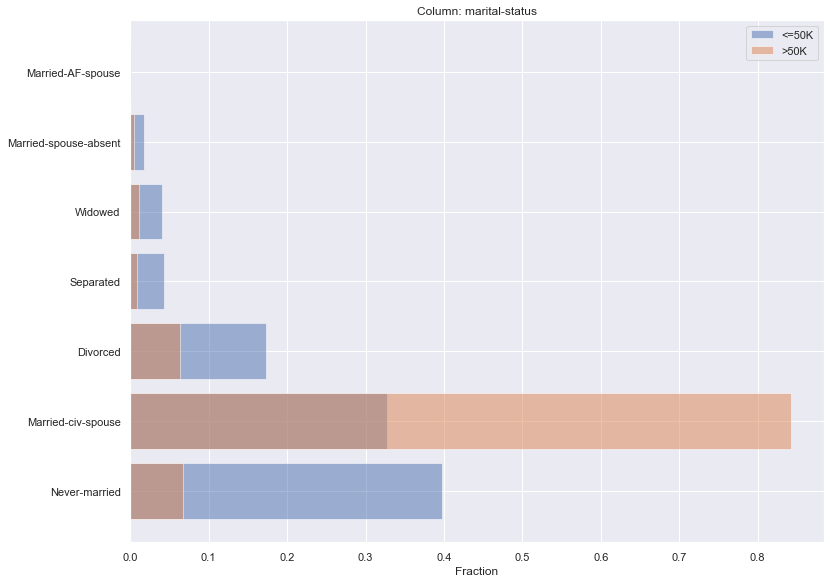

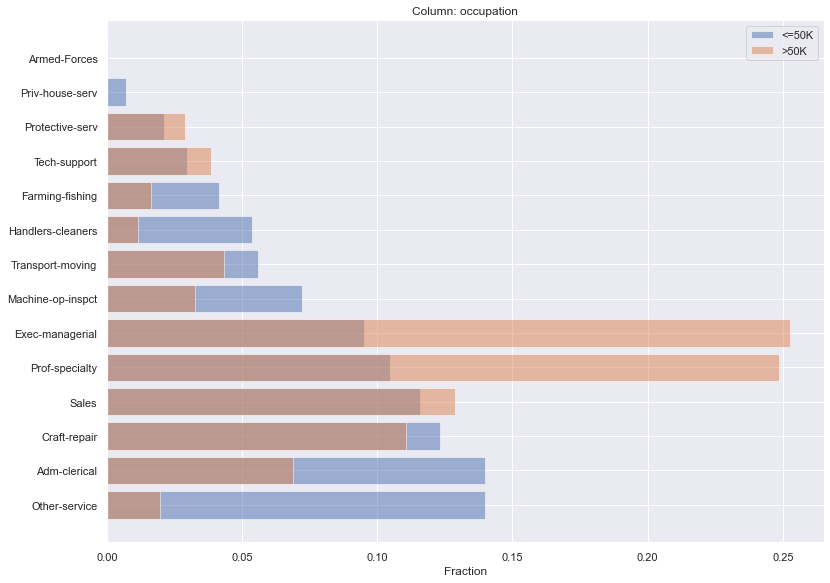

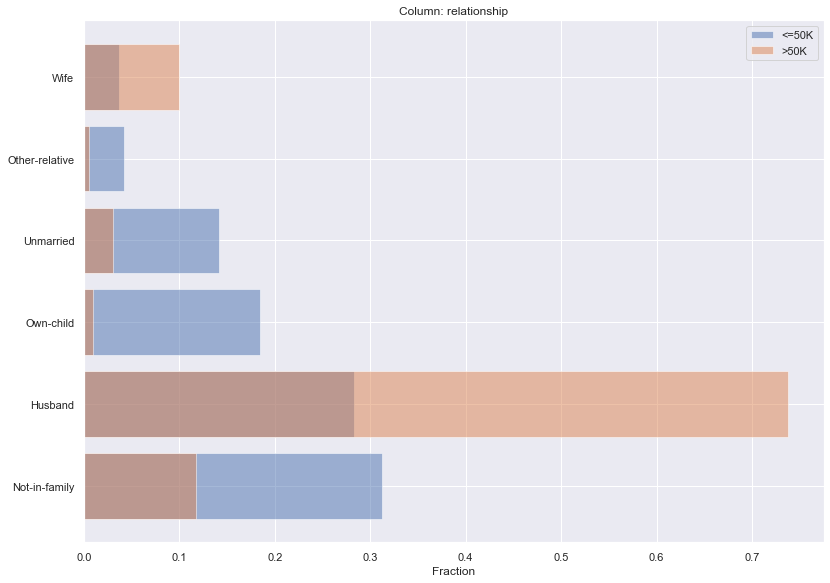

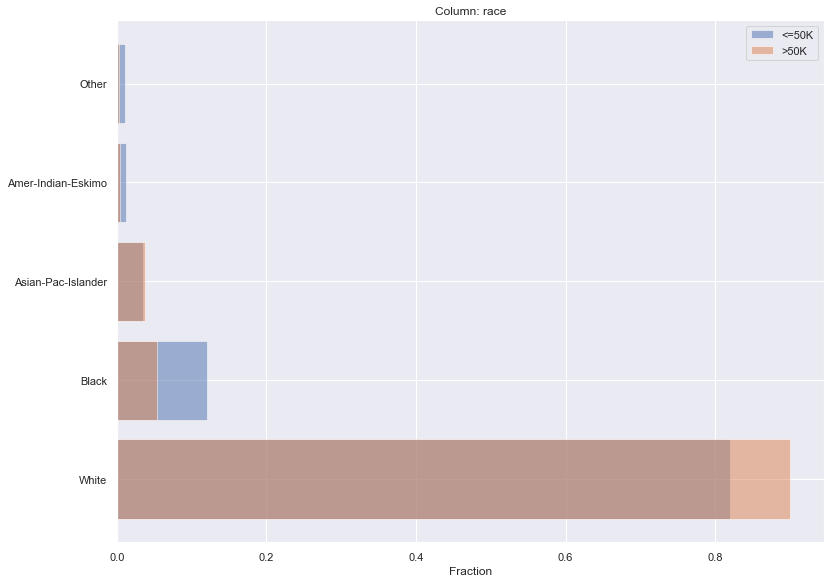

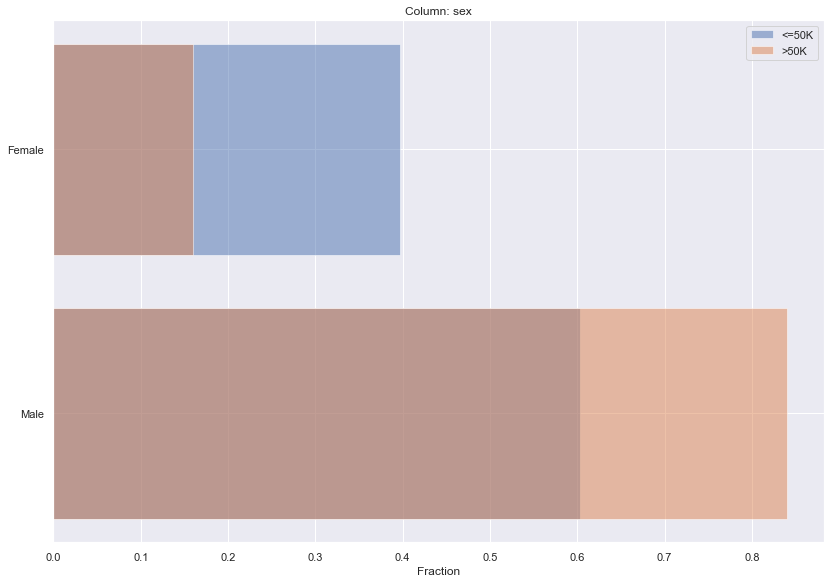

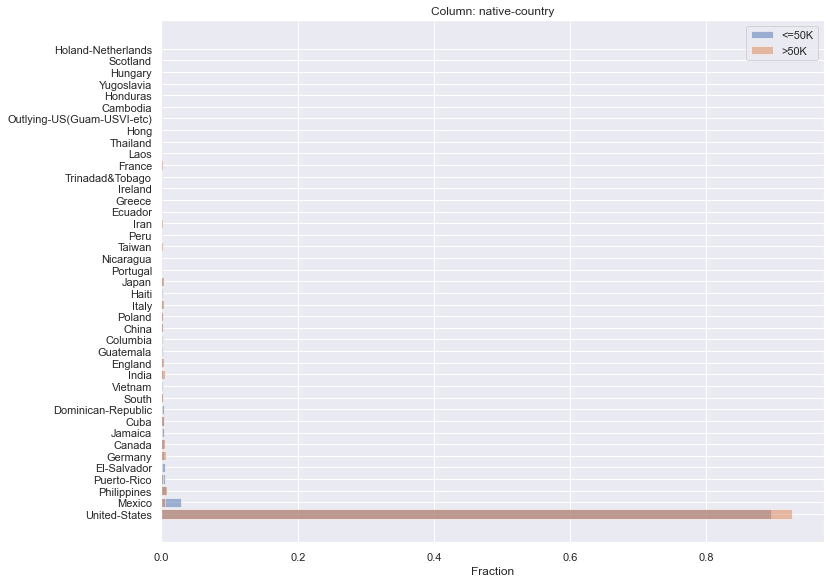

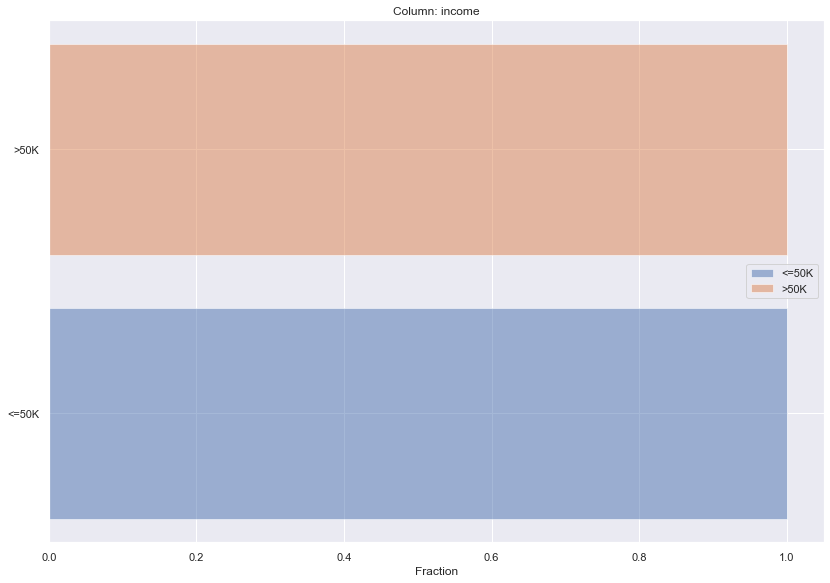

In [130]:
for colname in data[cat_col]:
    low_income = data.loc[data[target_column] == '<=50K', colname]
    high_income = data.loc[data[target_column] == '>50K', colname]
    
    low_income_stats = low_income.value_counts()
    high_income_stats = high_income.value_counts()
    
    low_bar = plt.barh(
        low_income_stats.index,
        low_income_stats.values / low_income_stats.values.sum(),
        alpha=0.5,
    )
    high_bar = plt.barh(
        high_income_stats.index,
        high_income_stats.values / high_income_stats.values.sum(),
        alpha=0.5,
    )
    
    plt.title('Column: ' + colname)
    plt.xlabel('Fraction')
    plt.legend([low_bar, high_bar], ['<=50K', '>50K'])
    #plt.yticks(np.arange(len(high_income_stats)), high_income_stats.index.categories)
    plt.tight_layout()
    plt.show()

Checking classes that impossible to differentiate

In [133]:
all_columns = data.columns.tolist()
predictor_columns = list(set(all_columns).difference([target_column]))

column_frequency = (data
    .groupby(predictor_columns, as_index=False)
    .agg({'income': 'nunique'}))

column_frequency[column_frequency.income == 2].shape[0]

590

It's interesting that there are categories that with exactly the same set of inputs expects to predict different income classes. There are no available features that can differentiate between these income classes.

Probably in the real world application we can use the final_weight variable in order to make fuzzy class from the income classes. For example, categories that don't have mixed income classes will be marked with 0 and 1, but other categories can be converted to the continuos probability. Let say 100 people have income <=50K, and 900 have income >50K (for exactly the same set of features) than we can convert income class to 0.9.

### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test
- A chi-square statistic is one way to show a relationship between two categorical variables.
- Here we test correlation of Categorical columns with Target column i.e Salary

In [103]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in data[cat_col]:
    if chi2_contingency(pd.crosstab(data['income'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

Column       Hypothesis Result
0       workclass  Reject Null Hypothesis
1       education  Reject Null Hypothesis
2  marital-status  Reject Null Hypothesis
3      occupation  Reject Null Hypothesis
4    relationship  Reject Null Hypothesis
5            race  Reject Null Hypothesis
6             sex  Reject Null Hypothesis
7  native-country  Reject Null Hypothesis
8          income  Reject Null Hypothesis

Checking outliers

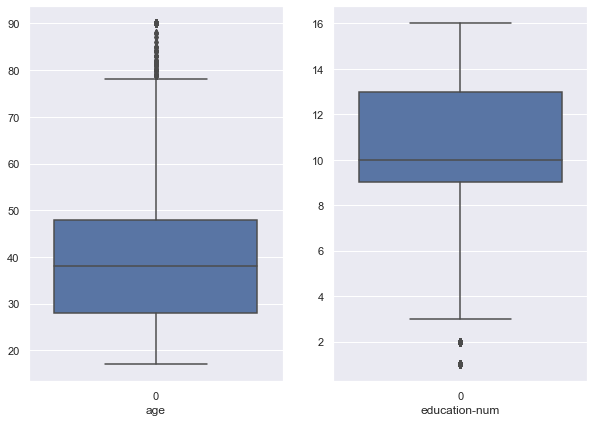

In [95]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=data[num_col[i]])
    plt.xlabel(num_col[i])

so we can see that to many outliers are there so we have to treat them before going to model building

### Treating outliers

In [96]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [98]:
replace_with_thresholds(data,num_col)

In [ ]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=data[num_col[i]])
    plt.xlabel(num_col[i])